In [58]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import models
from keras import layers

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(60000, 28 * 28)
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28)
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))



In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_test, y_test))

Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8591 - loss: 0.3843 - val_accuracy: 0.8656 - val_loss: 0.3636
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8799 - loss: 0.3241 - val_accuracy: 0.8740 - val_loss: 0.3537
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8899 - loss: 0.2947 - val_accuracy: 0.8619 - val_loss: 0.3753
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8950 - loss: 0.2800 - val_accuracy: 0.8801 - val_loss: 0.3339
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9004 - loss: 0.2651 - val_accuracy: 0.8777 - val_loss: 0.3438
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9032 - loss: 0.2547 - val_accuracy: 0.8716 - val_loss: 0.3524
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9125 - loss: 0.2340 - val_accuracy: 0.8851 - val_loss: 0.3231
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9147 - loss: 0.2234 - val_a

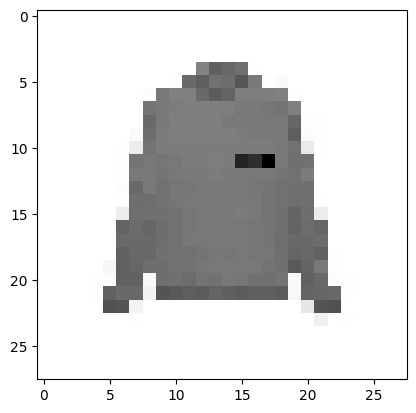

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: T-shirt/top


In [60]:
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


img = load_img('/content/Pullove.jpeg', target_size=(28, 28), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.show()

img = img_to_array(img)
img = img.reshape(1, 28 * 28)
img = img.astype('float32')
img = img / 255.0
np.argmax(model.predict(img), axis=-1)
prediction = model.predict(img)
predicted_class_index = np.argmax(prediction, axis=-1)
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predicted_class_label = class_labels[predicted_class_index[0]]
print(f"Predicted class: {predicted_class_label}")

def predict_image(image_path):
    img = load_img(image_path, target_size=(28, 28), color_mode='grayscale')
    img = img_to_array(img)
    img = img.reshape(1, 28 * 28)
    img = img.astype('float32')
    img = img / 255.0
    prediction = model.predict(img)

